In [ ]:
# РГР 
# Вариант 19

# Гамма распределение
Параметры распредления: 
Г(a,b)
MX = a*b
DX = a*b^2


# Задание
1) Найти выборочные характеристики исследуемой  с.в. :  выборочное среднее, 
выборочная дисперсия, выборочные коэффициенты асимметрии и эксцесса.
2) Построить э.ф.р. и нормированную гистограмму (гистограмма - красивая! без провалов 
и "неровностей").
3) По э.ф.р построить  (в одних и тех же координатных осях) доверительные полосы для 
теор. функции распределения  (т.ф.р.) с доверительными вероятностями  0.90 и 0.95. (не нужно!)
4) После анализа выборочных характеристик и вида гистограммы выдвинуть (осознанно!) 
гипотезу (или гипотезы) о виде распределения исследуемой с.в.
5) Проверить гипотезу (гипотезы) о виде распределения на основе критерия хи-квадрат 
Фишера. В отчете должно присутствовать определение критерия Фишера и описание 
его применения для конкретного случая (случаев).
6) После того, как принято решение о виде распределения, найти МП- оценки параметров 
распределения с. в.
7)  С этими оценками построить гипотетические теоретические кривые : ф.р.и плотность 
вероятности. Накложить эти кривые на э.ф.р. и нормированную гистограмму, 
соответственно. 
8) Привести анализ полученных результатов.

Любые дополнительные изыскания – приветствуются!

Пункт 3  – не является обязательным.
Пояснение к выполнению этого пункта – в отдельном файле (Построение_довер_полосы).

In [35]:
import random as rd
from collections import Counter
import pandas as pd
import statistics as st 
import scipy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as sts
from statsmodels.distributions.empirical_distribution import ECDF
from scipy. stats import norm
from scipy.optimize import fmin

In [7]:
# Ряд данных

sample = [   3.8927655e+00,   3.7835673e-01,   1.3031284e+00,  2.9314336e+00,  5.0138233e+00,   4.1886667e+00,   7.6860368e+00,   2.4567912e+00,   9.4212565e-01,   1.9239967e+00,
   3.4072242e+00,   2.8447597e+00,   3.6013263e+00,   4.0852533e+00,   4.7295470e-01,   7.6577791e+00,   8.8577032e+00,   1.4495514e+00,   4.9148951e-01,   2.8447114e+00,
   6.4016603e+00,   1.5892113e+00,   4.7184547e-01,   2.5039010e+00,   2.3287171e+00,   3.6626730e+00,   1.2068422e+00,   2.0421042e+00,   5.4614281e+00,   3.1904612e+00,
   2.5340484e+00,   6.5939214e-01,   1.5408567e+00,   1.6098386e+01,   3.5565916e+00,   5.6843702e+00,   9.0725130e-01,   2.4234775e+00,   4.2223844e+00,   2.9492997e+00,
   6.8746672e+00,   1.4047172e+00,   6.8440289e+00,   5.5242435e+00,   6.2419052e+00,   2.7016374e+00,   4.5963976e+00,   2.3048002e+00,   7.3112133e+00,   2.3727145e+00,
   9.4825149e+00,   1.8921929e+00,   2.1680130e+00,   2.1476885e+00,   7.4312279e-01,   6.6945534e+00,   2.5269774e+00,   9.5953868e-01,   6.8019593e+00,   6.5741438e+00]



In [9]:
# задание 1

print('Выборочное среднее - ', st.mean(sample))
print('Выборочная дисперсия - ', np.var(sample, ddof=1)) #несмещенная
print('Смещенная выборочная дисперсия - ', np.var(sample, ddof=0))
print('коэф ассиметрии - ', sts.skew(sample))
print('Эксцесс - ', sts.kurtosis(sample))
# Эти функцию предполагают, что выборка взята из нормального распределения и дают несмещенную оценку

# print('коэф ассиметрии',(np.mean((sample - np.mean(sample))**3) / np.var(sample, ddof=1)**(3/2)))
# print('эксцесс',(np.mean((sample - np.mean(sample))**4) / np.var(sample, ddof=1)**(2) - 3))

Выборочное среднее -  3.7005301478333332
Выборочная дисперсия -  8.099113365303102
Смещенная выборочная дисперсия -  7.96412814254805
коэф ассиметрии -  1.6616185192111967
Эксцесс -  4.280289598082403


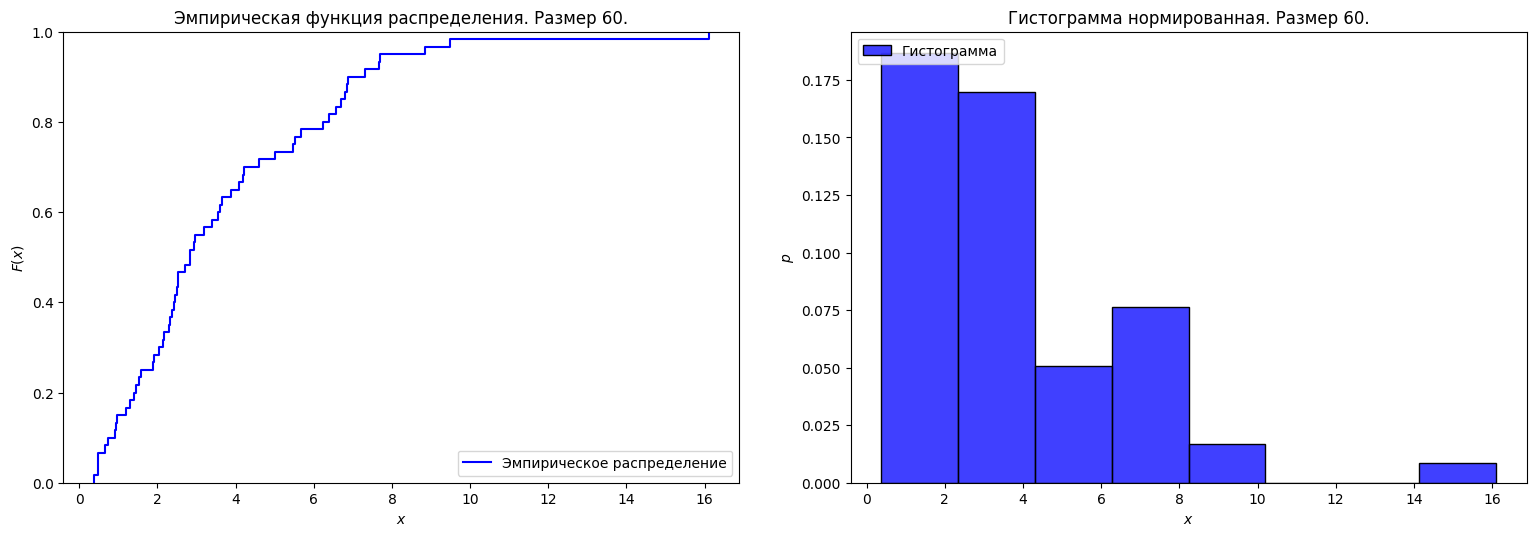

In [12]:
# задание 2 - Построение эмперической ф.р и гистограммы

fig, axes = plt.subplots(ncols=2, figsize=(16, 6))

sns.ecdfplot(sample, label='Эмпирическое распределение', color="blue", ax=axes[0])
axes[0].yaxis.label.set_text('$F(x)$')
axes[0].xaxis.label.set_text('$x$')
axes[0].legend(loc='lower right')
axes[0].title.set_text(f"Эмпирическая функция распределения. Размер {len(sample)}.")

sns.histplot(sample, stat="density", label='Гистограмма', color="blue", ax=axes[1], bins=8)
axes[1].yaxis.label.set_text('$p$')
axes[1].xaxis.label.set_text('$x$')
axes[1].legend(loc='upper left')
axes[1].title.set_text(f"Гистограмма нормированная. Размер {len(sample)}.")

fig.tight_layout(pad=3.0)
plt.show()

# ECDF показывает кумулятивное распределение данных выборки, 
# а нормализованная гистограмма показывает частоту данных выборки в каждом бине.

In [25]:
# Задание 4 - Анализ выборочных характеристик и вида гистограммы

# Существует два способа опредления распредления вида распределния:
# - Визуальный
# - Использование статистических тестов

from scipy.stats import norm, kstest, chi2, normaltest, chisquare, gamma, chi2_contingency

# Проверка на нормальное распредление
ks_statistic, p_value_norm = kstest(sample, norm.cdf)

print(f"p_value = {p_value_norm}" )
print(f"ks_statistic = {ks_statistic}")

# Если p-значение < 0,05
# мы можем сделать вывод, что данные выборки не соответствуют нормальному распределению.


p_value = 6.1311031385815564e-34
ks_statistic = 0.7370678686984046


In [24]:
# Проверка на Гамма - распредление


params = gamma.fit(sample)
D, p_value_gamm = kstest(sample, 'gamma', args=params)

print(f"P-value = {p_value_gamm}")
print(f"ks_statistic = {D}")

# Так-как значение p-value больше 0.05, отсюда можно сделать вывод,
# что данные из выборки соответсвуют Гамма распредлению (ассиметрия и эксцесс положительны)

P-value = 0.7478296502054841
ks_statistic = 0.08490984591221545


In [48]:
# Проверка гипотезы на основании Хи - квадрат Фишера
# H0 - Гамма распредление
# H1 - Не Гамма распредление 

# 1. Для того, чтобы применить критерий Хи - квадрат Фишера, разобъем нашу выборку на равыне группы
n = 60
N = 6
k = n // 6

groups = []
for i in range (N):
    groups.append(np.array(sample[k*i: k*(i+1)]))
groups = np.array(groups) # создали 6 массивов(групп) по 10 элементов


#2. Найдем вектор параметров  𝜃̂ решая задачу минимизации:
def func_to_min(x):
    # Статистика по формуле выше
    loc, scale = x[0], x[1]
    def p_group(left_bound, right_bound):
        # Возвращаяет вероятность попасть в отрезок от left_bound до right_bound
        return sts.norm.cdf(right_bound, loc=loc, scale=scale) - sts.norm.cdf(left_bound, loc=loc, scale=scale)  
    # scale = стандартное отклонение
    s = 0
    for i, group in enumerate(groups):
        # print(group)
        left_bound = -np.inf if i == 0 else group[0]
        right_bound = np.inf if i == len(groups) - 1 else groups[i+1][0]
        p_i = p_group(left_bound, right_bound)
        # print(left_bound, right_bound, p_i)
        s += (v[i] - n * p_i) / (n * p_i)
    
    return s

# 3. Находим точку минимума ф-ци 
loc, scale = fmin(func_to_min, [1.0, 1.0])
m_hat = loc #6.563556440454581
var_hat = scale**2 #19.767122742757973

# 4. Находим значение статистики в точке минимума

X_stat = func_to_min([m_hat, scale]) #-3.271936712756093

#5. находим критическую точку используя распределение  𝜒2 c N-3 степенями свободы:

X_crit = sts.chi2.ppf(1-.05, df=N-3) # 7.814727903251179

# 6. Сравниваем полученную статистику с критическим значением и принимаем  𝐻0

X_stat < X_crit #True
 
    


Optimization terminated successfully.
         Current function value: -3.271937
         Iterations: 59
         Function evaluations: 112


/var/folders/lx/m59gdlzs4ss_5_t5k3xl58f80000gn/T/ipykernel_20186/625349516.py:31: RuntimeWarning: divide by zero encountered in double_scalars
  s += (v[i] - n * p_i) / (n * p_i)


True

In [57]:
# Задание 5 - найти МП- оценки параметров Гамма - распределения с. в.

m = np.mean(sample)
v = np.var(sample)
shape_mom = m**2 / v
scale_mom = v / m
params_mom = shape_mom, scale_mom
params_mle = gamma.fit(sample, floc=0)

print("Метод моментов:", params_mom)
print("Метод МП:", params_mle)

# Эти оценки показывают значения параметров, 
# которые максимизируют вероятность наблюдать данную выборку данных,
# и могут быть использованы для дальнейшего моделирования

Метод моментов: (1.7194504068642655, 2.1521586973723377)
Метод МП: (1.8171306469441137, 0, 2.036468953983331)


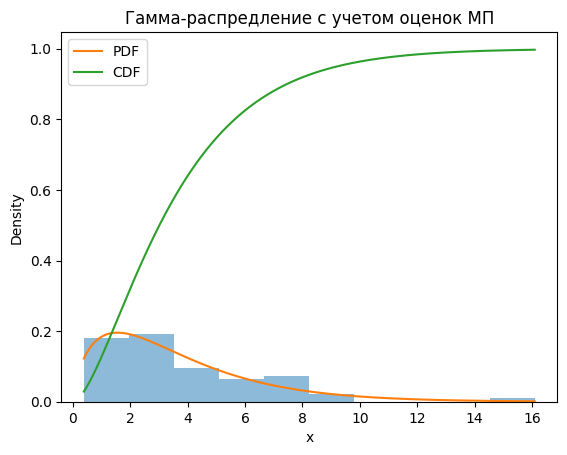

In [82]:
# Задание 6 - 

# С этими оценками построить гипотетические теоретические кривые : ф.р.и плотность 
# вероятности. Накложить эти кривые на э.ф.р. и нормированную гистограмму, 
# соответственно.

shape_mle, scale_mle = params_mom

# построение теоретичсеких PDF и CDF на основе оценок МП
x = np.linspace(min(sample), max(sample), 1000)
pdf = gamma.pdf(x, a=shape_mle, scale=scale_mle)
cdf = gamma.cdf(x, a=shape_mle, scale=scale_mle)

# График эмпрической CDF и нормализованная диагарамма
plt.hist(sample, density=True, alpha=0.5, bins=10)
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Гамма-распредление с учетом оценок МП")

# График теоричисеких кривых CDF и PDF 
plt.plot(x, pdf, label="PDF")
plt.plot(x, cdf, label="CDF")
plt.legend()
plt.show()

# Выводы

Используя теоретические знания, удалось выдвинуть гипотезу о виде распредления и проверить ее на основании 
критерия согласия Фишера 𝜒2, предположение оказалось верным и был сделан вывод о том, что нулевую гипотезу принять можно. 
Были найдены оценки МП(максимального правдоподобия), которые показывают макисмально вероятные данные из нашей выборки.
С учетом этих параметров были построены гипотетические теоретические кривые, функция распределния и график плотности вероятности.
  